# 비지도 학습 : K-means

 <hr/>

In [1]:
# 기본 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib.font_manager as fm 
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

#------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn      # 머신러닝 학습을 위한 모듈

####
import sklearn.datasets as datasets
import sklearn.metrics
from sklearn.metrics import accuracy_score

<hr/>

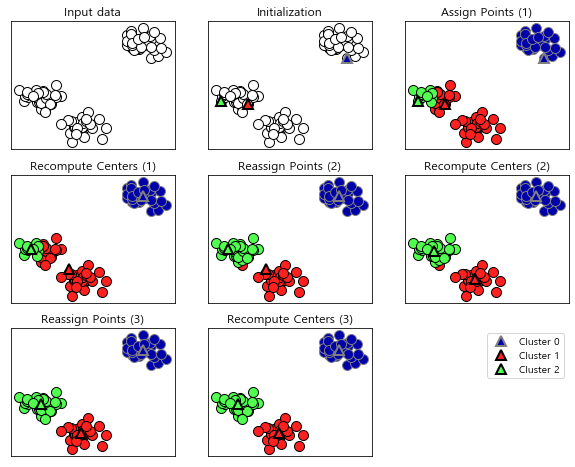

In [2]:
#  K-means 알고리즘 이해하기 
mglearn.plots.plot_kmeans_algorithm()
# 중심점의 위치가 중요! 
# 처음부터 중심점을 잘잡으면 반복 횟수가 줄어들어 효율 증가

In [3]:
# KMeans 모듈 임포트
from sklearn.cluster import KMeans

In [4]:
X, y = sklearn.datasets.make_blobs()

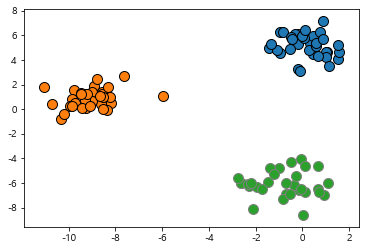

In [5]:
# 실제 정답
mglearn.discrete_scatter(X[:,0],X[:,1],y,markers="o")

In [6]:
# 비지도 학습이기 때문에 레이블을 넘겨주지 않는다.
# 그렇기 때문에 비지도 학습은 엄청난 데이터를 필요로 한다.
km = KMeans(n_clusters=3).fit(X)  

In [7]:
# 비지도 학습을 통해 얻은 레이블
lbl = km.labels_

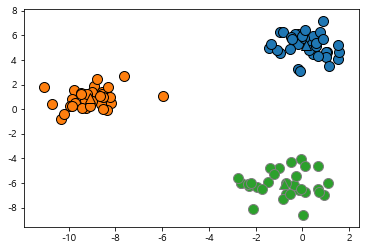

In [8]:
# 찾은 레이블과 실제 데이터를 그래프로 비교 
mglearn.discrete_scatter(X[:,0],X[:,1],lbl,markers="o")
# 각 군집의 중심점을 그래프에 표시
mglearn.discrete_scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
                         [0, 1, 2],markers="^")

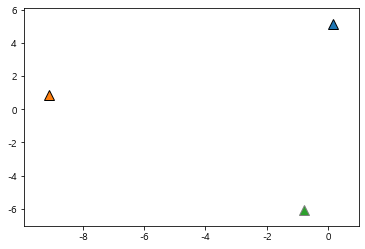

In [9]:
mglearn.discrete_scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
                         [0, 1, 2],markers="^")

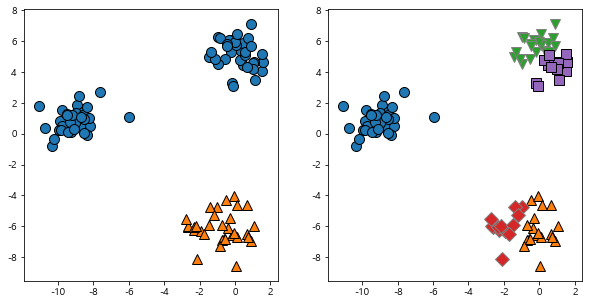

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

idx = 0
for k in [2, 5]:
    km = KMeans(n_clusters = k).fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], lbl, ax = axes[idx])
    idx += 1

In [11]:
KMeans().fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
# iris 샘플 
iris = sklearn.datasets.load_iris()

X = pd.DataFrame(iris.data,columns=["sepal_length","sepal_width",
                                    "petal_length","petal_width"])
y = pd.DataFrame(iris.target, columns=['target'])


Text(0.5, 1.0, '꽃잎')

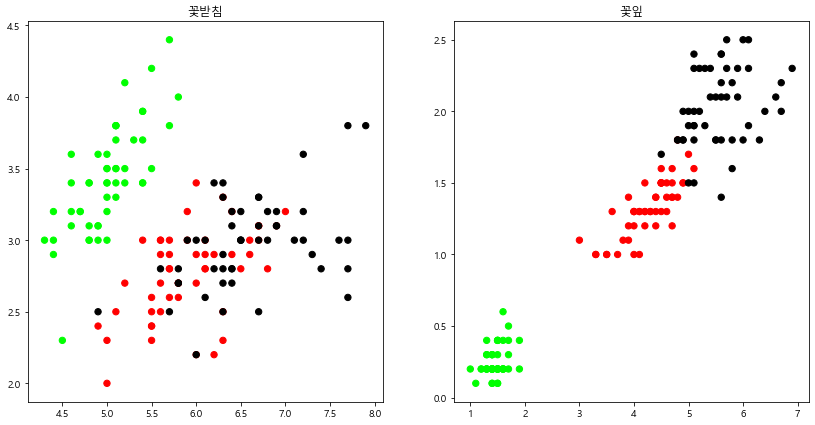

In [13]:
plt.figure(figsize=(14,7))
colormap = np.array(['lime','red','black'])

plt.subplot(1,2,1)
plt.scatter(X.sepal_length, X.sepal_width,c=colormap[y.target], s = 40)
plt.title("꽃받침")

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width,c=colormap[y.target], s = 40)
plt.title("꽃잎")

In [14]:
model = KMeans(n_clusters=3).fit(X)

In [15]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

Text(0.5, 1.0, '결과')

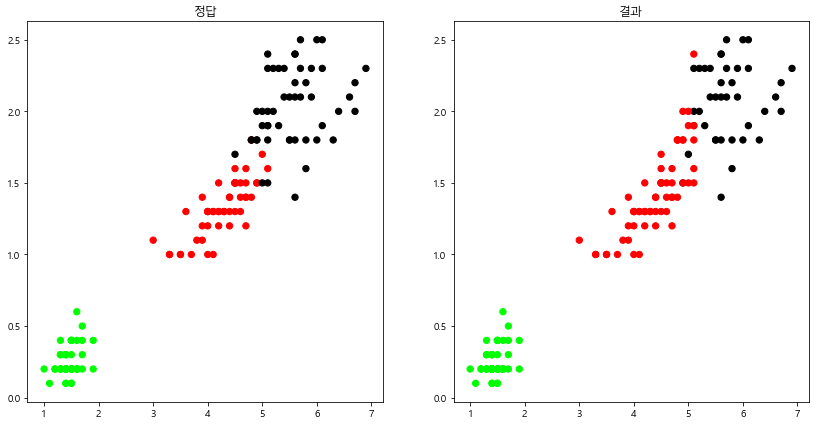

In [16]:
# 정답과 결과를 그래프로 비교 
plt.figure(figsize=(14,7))
colormap = np.array(['lime','red','black'])

plt.subplot(1,2,1)
plt.scatter(X.petal_length, X.petal_width,c=colormap[y.target], s = 40)
plt.title("정답")

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width,c=colormap[model.labels_], s = 40)
plt.title("결과")

In [17]:
accuracy_score(y,model.labels_)

0.8933333333333333

In [18]:
# 수치로써 분석
from sklearn.metrics import confusion_matrix

confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]], dtype=int64)

In [19]:
# 예제 
# 사람의 키와 몸무게 
df = pd.DataFrame(columns=['height','weight'])
df.loc[0] = [185, 60]
df.loc[1] = [180, 60]
df.loc[2] = [185, 70]
df.loc[3] = [165, 63]
df.loc[4] = [155, 68]
df.loc[5] = [170, 75]
df.loc[6] = [175, 80]

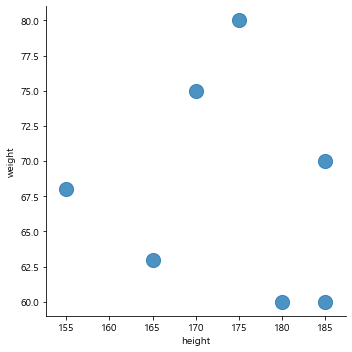

In [21]:
# 현재 데이터를 seaborn의 lmplot으로 
sns.lmplot('height','weight',data=df,fit_reg=False,scatter_kws={'s':200})

In [22]:
model = KMeans(n_clusters=3).fit(df.values)

In [24]:
df['label'] = model.labels_
df

,height,weight,label
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,2
4,155,68,2
5,170,75,0
6,175,80,0


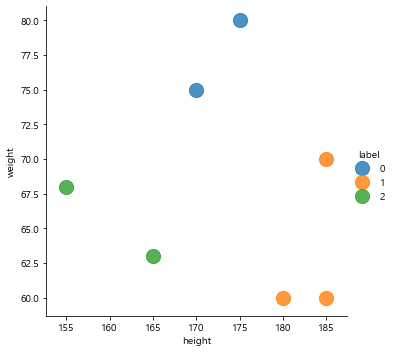

In [26]:
sns.lmplot('height','weight',data=df,fit_reg=False,scatter_kws={'s':200},hue='label')